**1. What is Machine Learning?**

Machine Learning is a method where algorithms learn from data to make predictions or decisions. In this case, we'll use the dataset to predict whether a banknote is real or fake.

**2. Types of Machine Learning (Supervised Learning)**

In this dataset, we are dealing with a supervised learning problem because we have labeled data (real or fake notes).

**3. Key Concepts: Features, Labels, Models, and Algorithms**



*   Features: Image.Var, Image.Skew, Image.Curt, Entropy.
*   Label: Class (0 for real, 1 for fake).
*   Model: We will use logistic regression.
*   Algorithm: Logistic regression algorithm will be used to fit the model.



**4. Data Preprocessing: Cleaning, Scaling, and Encoding**

We’ll load the dataset and preprocess it.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/bank_note_data.csv')

# Check for missing values
print(df.isnull().sum())  # Assuming there are no missing values

# Split dataset into features (X) and label (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Image.Var     0
Image.Skew    0
Image.Curt    0
Entropy       0
Class         0
dtype: int64


**5. Introduction to Classification (Logistic Regression)**

Using logistic regression to classify the notes as real or fake.

In [3]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


**6. Evaluation Metrics: Accuracy, Precision, Recall, F1-Score**

Evaluating the model's performance using accuracy, confusion matrix, and classification report.

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 97.82%
Confusion Matrix:
[[144   4]
 [  2 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



**7. Bias and Variance Tradeoff**

Discussing bias and variance in the context of the model's performance. If the model is too simple, it may underfit (high bias). If it is too complex, it may overfit (high variance). We can use metrics like the confusion matrix and classification report to identify these issues.

**8. Introduction to Python Libraries: NumPy, Pandas, Matplotlib**

Visualizing the features to understand their distribution.

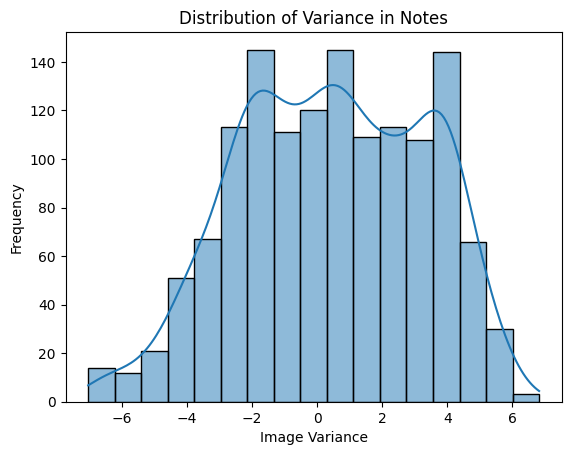

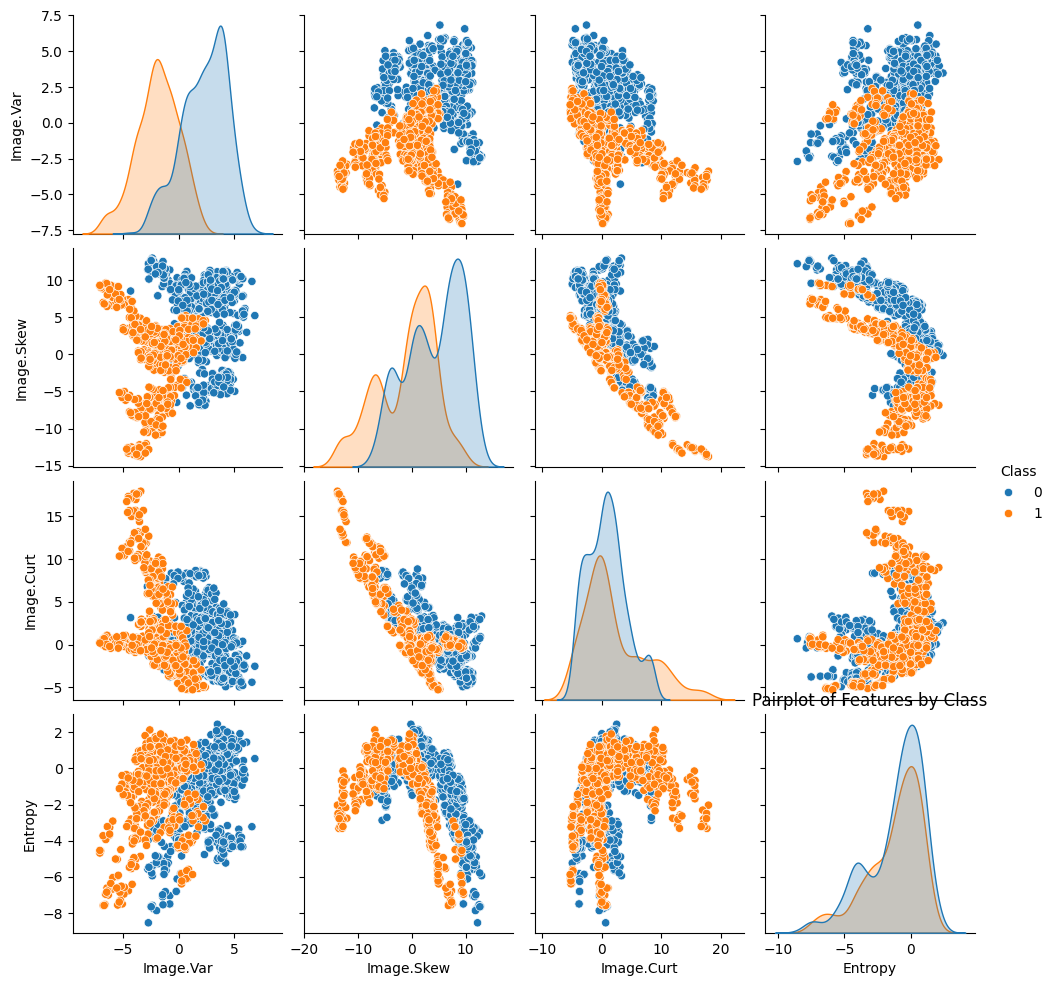

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of one of the features
sns.histplot(df['Image.Var'], kde=True)
plt.title("Distribution of Variance in Notes")
plt.xlabel("Image Variance")
plt.ylabel("Frequency")
plt.show()

# Pairplot to show relationships between features and the label
sns.pairplot(df, hue='Class')
plt.title("Pairplot of Features by Class")
plt.show()


**Summary of Basic Level Implementation**

The above code covers basic machine learning concepts using the bank_note_data.csv dataset, including:


1.   Loading and preprocessing the dataset
2.   Training a logistic regression model
3.   Evaluating the model using various metrics
4.   Visualizing feature distributions and relationships









**9. Advanced Classification Techniques**

We can explore more sophisticated classification methods, such as Support Vector Machines (SVM) and Random Forests.

Support Vector Machines (SVM): SVM is a powerful classifier that works well for both linear and non-linear data.

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm * 100:.2f}%")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 100.00%
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Random Forest: Random Forest is an ensemble method that combines multiple decision trees for better accuracy.

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 99.27%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



**10. Unsupervised Learning: Clustering**

Although our dataset is primarily used for supervised learning, we can still explore clustering methods to see if there are any inherent groupings within the data. We will use K-Means Clustering for this.

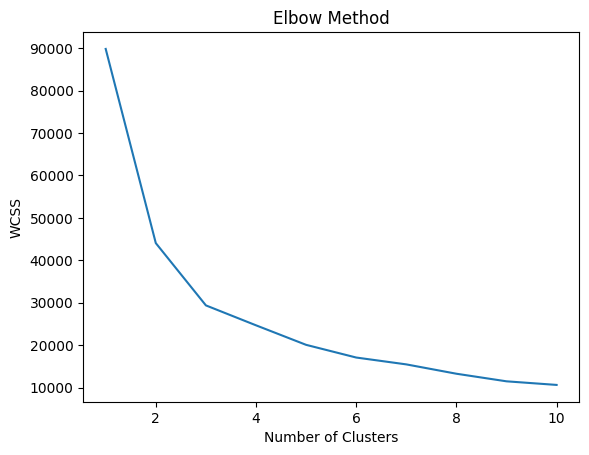

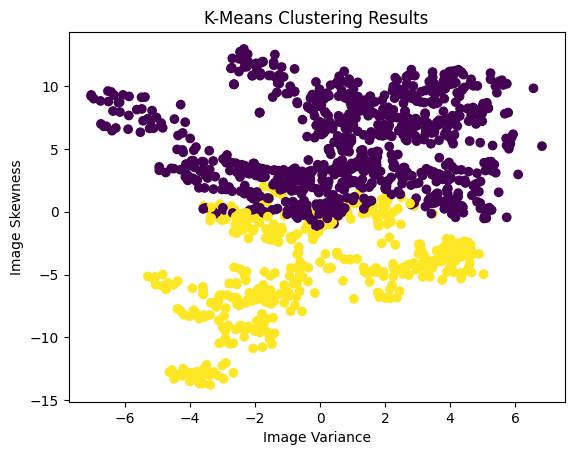

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means with an optimal number of clusters (e.g., 2)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Adding cluster results to the original DataFrame
df['Cluster'] = y_kmeans

# Visualizing clusters (using only the first two features for 2D representation)
plt.scatter(df['Image.Var'], df['Image.Skew'], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Clustering Results")
plt.xlabel("Image Variance")
plt.ylabel("Image Skewness")
plt.show()


**11. Feature Engineering and Feature Selection**

Feature engineering involves creating new features that can improve model performance. In this case, since the dataset already has relevant features, we can explore methods to assess feature importance.

For Random Forest, we can use the feature importances to see which features contribute the most to the model’s decisions.

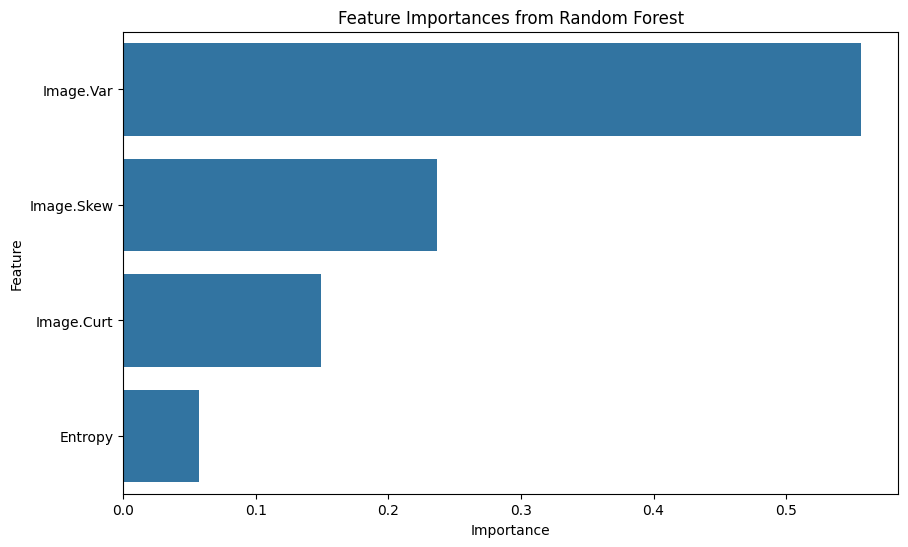

In [9]:
# Fit Random Forest model again to get feature importances
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importances from Random Forest")
plt.show()


**12. Model Evaluation: Confusion Matrix, ROC-AUC Curve**

In addition to accuracy and classification reports, we can also visualize the confusion matrix and the ROC-AUC curve.

**Confusion Matrix:**

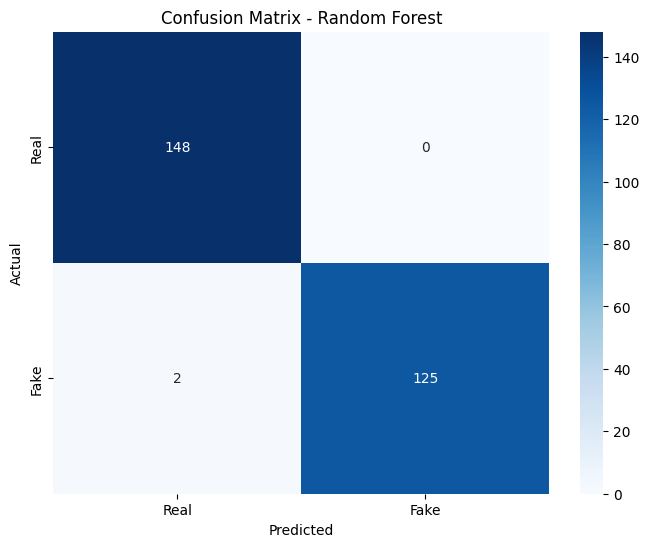

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()


**ROC-AUC Curve:**

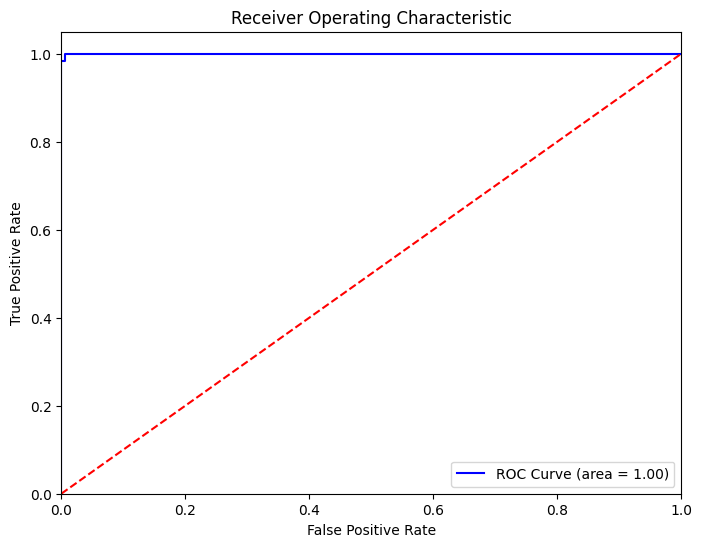

In [11]:
from sklearn.metrics import roc_curve, auc

# Get the probability scores for the positive class
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**Summary of Intermediate Level Implementation**


*   Advanced Classification Techniques: We explored SVM and Random Forest classifiers.
*   Unsupervised Learning: Implemented K-Means clustering to discover inherent groupings in the data.
*   Feature Engineering: Visualized feature importances from the Random Forest model.
*   Model Evaluation: Used confusion matrices and ROC-AUC curves to evaluate model performance.









**13. Hyperparameter Tuning with Grid Search**

Hyperparameter tuning is crucial for optimizing model performance. We can use GridSearchCV to systematically search through hyperparameters for the best combination.

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score * 100:.2f}%")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 99.18%


**14. Ensemble Methods**

Ensemble methods combine multiple models to improve prediction accuracy. We will implement Voting Classifier and Gradient Boosting.

**Voting Classifier:**

In [13]:
from sklearn.ensemble import VotingClassifier

# Initialize individual classifiers
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier(n_estimators=100)
# Use logistic regression as well
lr_model = LogisticRegression()

# Combine models in a Voting Classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_model),
                                           ('rf', rf_model),
                                           ('lr', lr_model)],
                              voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the Voting Classifier
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print(f"Voting Classifier Accuracy: {accuracy_voting * 100:.2f}%")


Voting Classifier Accuracy: 100.00%


**Gradient Boosting:**

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {accuracy_gb * 100:.2f}%")


Gradient Boosting Model Accuracy: 100.00%


**15. Model Evaluation: Cross-Validation and ROC-AUC**

In addition to using the confusion matrix, we can also implement cross-validation and calculate the ROC-AUC score for better evaluation.

**cross-validation:**

In [15]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Random Forest Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean() * 100:.2f}%")


Random Forest Cross-Validation Scores: [0.99272727 0.98909091 0.98540146 0.99635036 0.99635036]
Mean Cross-Validation Score: 99.20%


**ROC-AUC Score:**

In [16]:
from sklearn.metrics import roc_auc_score

# Get probability scores for the positive class
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc_score_gb = roc_auc_score(y_test, y_probs_gb)
print(f"Gradient Boosting ROC AUC Score: {roc_auc_score_gb:.2f}")


Gradient Boosting ROC AUC Score: 1.00


**16. Model Interpretability with SHAP**

SHAP (SHapley Additive exPlanations) helps in understanding the contribution of each feature to the model's predictions.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 23.5 MB/s eta 0:00:00


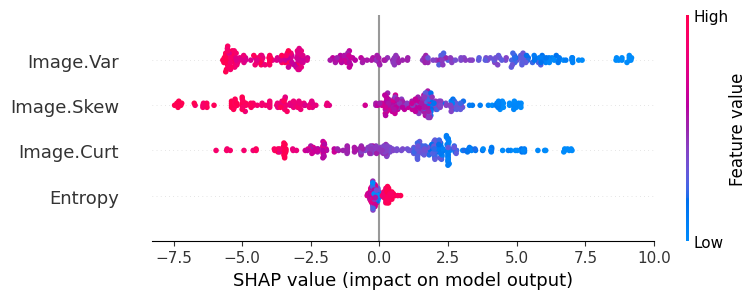

In [18]:
!pip install shap --no-cache-dir
import shap

# Create SHAP explainer for Gradient Boosting
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# Plotting SHAP values
shap.summary_plot(shap_values, X_test)


**17. Deploying Machine Learning Models**

Deploying models is essential for practical applications. Although actual deployment requires a framework (like Flask or FastAPI), here’s a brief outline of the steps you would take:

Save the model using joblib or pickle.
Create an API to serve predictions using a web framework.
Use a cloud platform (like AWS, Google Cloud, or Heroku) to host the API.

Here’s how you can save your trained model:

In [19]:
import joblib

# Save the Gradient Boosting model
joblib.dump(gb_model, 'gradient_boosting_model.joblib')


['gradient_boosting_model.joblib']

**Summary of Advanced Level Implementation**


*   Hyperparameter Tuning: Used GridSearchCV to find optimal hyperparameters for the Random Forest model.
*   Ensemble Methods: Implemented a Voting Classifier and Gradient Boosting to improve model performance.
*   Model Evaluation: Conducted cross-validation and calculated the ROC-AUC score for better evaluation metrics.
*   Model Interpretability: Employed SHAP for understanding feature contributions.
*   Model Deployment: Discussed saving the model and a brief outline for deploying it.











